In [21]:
%%writefile MakeSwissRollUniform.py

""" Compute the function that is the inverse of the integral of sqrt(1+(b*theta)**2) 
"""

from numpy import arcsinh, sqrt
import numpy as np

class SwissToUniform:
    def __init__(self,_from=0,_to=5,resolution=0.01,b=1):
        self.T=np.arange(_from-2*resolution,_to+2*resolution,resolution) # range of theta
        self.b=b
        self.X=np.array([self.ThetatoX(yy) for yy in list(self.T)]) # table of X as a function of theta

    def ThetatoX(self,theta):
        b=self.b
        return (theta*sqrt((b*theta)**2 + 1) + arcsinh(b*theta)/b)/2.

    def XtoTheta(self,x):
        X=self.X
        l=X.shape[0]
        i=int(l/2.)
        step=l/4.
        while True:
            if X[i]>x:
                i=int(i-step)
            else:
                i=int(i+step)
            step/=2.
            if step<1.:
                break
        return self.T[i]

Overwriting MakeSwissRollUniform.py


Populating the interactive namespace from numpy and matplotlib


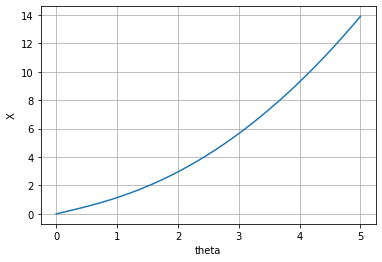

In [18]:
#### Plotting the function
%pylab inline
Map = SwissToUniform(0,5,0.001)
y=np.array([Map.ThetatoX(yy) for yy in list(Map.T)])
plot(Map.T,y)
ylabel('X')
xlabel('theta')
grid()

In [19]:
for x in arange(0,13,0.5):
    theta = Map.XtoTheta(x)
    x2=Map.ThetatoX(theta)
    print(x,theta,x2,np.abs(x-x2))

0.0 -0.001 -0.0010000001666666417 0.0010000001666666417
0.5 0.481 0.49895166333939145 0.001048336660608551
1.0 0.891 0.9977653313109325 0.0022346686890675205
1.5 1.234 1.498771955279253 0.0012280447207468903
2.0 1.528 2.000267836967427 0.00026783696742693763
2.5 1.7850000000000001 2.497645183048727 0.00235481695127282
3.0 2.019 3.0005325524380924 0.0005325524380923596
3.5 2.2300000000000004 3.4960086186677986 0.003991381332201449
4.0 2.4270000000000005 3.9952556030699817 0.004744396930018269
4.5 2.611 4.493951455919491 0.006048544080509366
5.0 2.785 4.994621418049376 0.005378581950624017
5.5 2.951 5.498826381839701 0.0011736181602985951
6.0 3.108 5.999704910056743 0.0002950899432567766
6.5 3.2560000000000002 6.493352872585039 0.006647127414961318
7.0 3.4010000000000002 6.997299477415658 0.0027005225843419467
7.5 3.5400000000000005 7.49932802530996 0.0006719746900403223
8.0 3.6730000000000005 7.997091919620761 0.002908080379238953
8.5 3.8030000000000004 8.50012201163363 0.00012201163363

In [1]:
#### Sympy code for computing the integral used in the function I above
from sympy import *
theta=Symbol('theta')
a=Symbol('a')
b=Symbol('b')
integrate(sqrt(1+(b*theta)**2),theta)

theta*sqrt(b**2*theta**2 + 1)/2 + asinh(b*theta)/(2*b)

In [16]:
Map.XtoTheta(0.01)

0.008

In [3]:
I=simplify(integrate(sqrt(1+(b*theta)**2),theta))
ccode(I)

'(1.0/2.0)*(b*theta*sqrt(pow(b, 2)*pow(theta, 2) + 1) + asinh(b*theta))/b'